In [5]:
# Importing necessary libraries for data manipulation, visualization, and plotting.
import pandas as pd  # For data manipulation and analysis.
import numpy as np  # For numerical operations and working with arrays.
import matplotlib.pyplot as plt  # For creating static visualizations.
import matplotlib  # For customizing Matplotlib settings.
import seaborn as sns  # For statistical data visualization based on Matplotlib.
import squarify  # For creating treemaps (visualizing hierarchical data).

# `%matplotlib inline` ensures that plots appear directly in the notebook (for Jupyter notebooks).
%matplotlib inline

# Setting Seaborn style for the plots to make them visually appealing.
sns.set_style('darkgrid')

# Customizing the font size for all text in Matplotlib plots (e.g., axis labels, title, etc.).
matplotlib.rcParams['font.size'] = 14

# Setting the default figure size for all plots (9 inches wide, 5 inches tall).
matplotlib.rcParams['figure.figsize'] = (9, 5)

# Customizing the default background color of the figure.
matplotlib.rcParams['figure.facecolor'] = 'D9DFC6'  # Light color shade for the background.


In [ ]:
# Loading a CSV file into a Pandas DataFrame
df = pd.read_csv(filepath_or_buffer='country_vaccinations_dashboard/country_vaccinations.csv')

In [7]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
# Dropping unnecessary columns ('source_website' and 'iso_code') from the DataFrame
df.drop(columns=['source_website', 'iso_code'], inplace=True)

In [5]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   date                                 86512 non-null  object 
 2   total_vaccinations                   43607 non-null  float64
 3   people_vaccinated                    41294 non-null  float64
 4   people_fully_vaccinated              38802 non-null  float64
 5   daily_vaccinations_raw               35362 non-null  float64
 6   daily_vaccinations                   86213 non-null  float64
 7   total_vaccinations_per_hundred       43607 non-null  float64
 8   people_vaccinated_per_hundred        41294 non-null  float64
 9   people_fully_vaccinated_per_hundred  38802 non-null  float64
 10  daily_vaccinations_per_million       86213 non-null  float64
 11  vaccines                    

In [7]:
# Converting the 'date' column to a datetime format for easier analysis
df.date = pd.to_datetime(df.date)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   date                                 86512 non-null  datetime64[ns]
 2   total_vaccinations                   43607 non-null  float64       
 3   people_vaccinated                    41294 non-null  float64       
 4   people_fully_vaccinated              38802 non-null  float64       
 5   daily_vaccinations_raw               35362 non-null  float64       
 6   daily_vaccinations                   86213 non-null  float64       
 7   total_vaccinations_per_hundred       43607 non-null  float64       
 8   people_vaccinated_per_hundred        41294 non-null  float64       
 9   people_fully_vaccinated_per_hundred  38802 non-null  float64       
 10  daily_vacc

In [9]:
df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization


In [10]:
df.tail()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
86507,Zimbabwe,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86508,Zimbabwe,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86509,Zimbabwe,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86510,Zimbabwe,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health
86511,Zimbabwe,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health


In [11]:
df.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,86512,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,2021-09-01 17:09:45.907157504,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
min,2020-12-02 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2021-05-27 00:00:00,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,2021-09-04 00:00:00,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,2021-12-12 00:00:00,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,2022-03-29 00:00:00,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000
std,NaN,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440


In [12]:
# Getting the top 30 countries based on the number of occurrences in the 'country' column
top_country = df['country'].value_counts().head(30).index

# Creating a new DataFrame containing only the rows where the 'country' is in the top 30
new_df = df[df.country.apply(lambda x: True if x in top_country else False)]

new_df.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
2848,Argentina,2020-12-29,20487.0,20482.0,5.0,NaN,NaN,0.04,0.04,0.0,NaN,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health
2849,Argentina,2020-12-30,40589.0,40579.0,10.0,20102.0,20102.0,0.09,0.09,0.0,441.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health
2850,Argentina,2020-12-31,43394.0,43384.0,10.0,2805.0,11454.0,0.10,0.10,0.0,251.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health
2851,Argentina,2021-01-01,43521.0,43511.0,10.0,127.0,7678.0,0.10,0.10,0.0,168.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health
2852,Argentina,2021-01-02,46833.0,46821.0,12.0,3312.0,6586.0,0.10,0.10,0.0,144.0,"CanSino, Moderna, Oxford/AstraZeneca, Pfizer/B...",Ministry of Health


In [13]:
# Filtering the DataFrame to include only rows where the country is 'Afghanistan'
df[df['country'].apply(lambda x: True if x == 'Afghanistan' else False)]

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Afghanistan,2022-03-18,NaN,NaN,NaN,NaN,11010.0,NaN,NaN,NaN,276.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
390,Afghanistan,2022-03-19,NaN,NaN,NaN,NaN,9838.0,NaN,NaN,NaN,247.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
391,Afghanistan,2022-03-20,NaN,NaN,NaN,NaN,8665.0,NaN,NaN,NaN,218.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization
392,Afghanistan,2022-03-21,NaN,NaN,NaN,NaN,7492.0,NaN,NaN,NaN,188.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   date                                 86512 non-null  datetime64[ns]
 2   total_vaccinations                   43607 non-null  float64       
 3   people_vaccinated                    41294 non-null  float64       
 4   people_fully_vaccinated              38802 non-null  float64       
 5   daily_vaccinations_raw               35362 non-null  float64       
 6   daily_vaccinations                   86213 non-null  float64       
 7   total_vaccinations_per_hundred       43607 non-null  float64       
 8   people_vaccinated_per_hundred        41294 non-null  float64       
 9   people_fully_vaccinated_per_hundred  38802 non-null  float64       
 10  daily_vacc

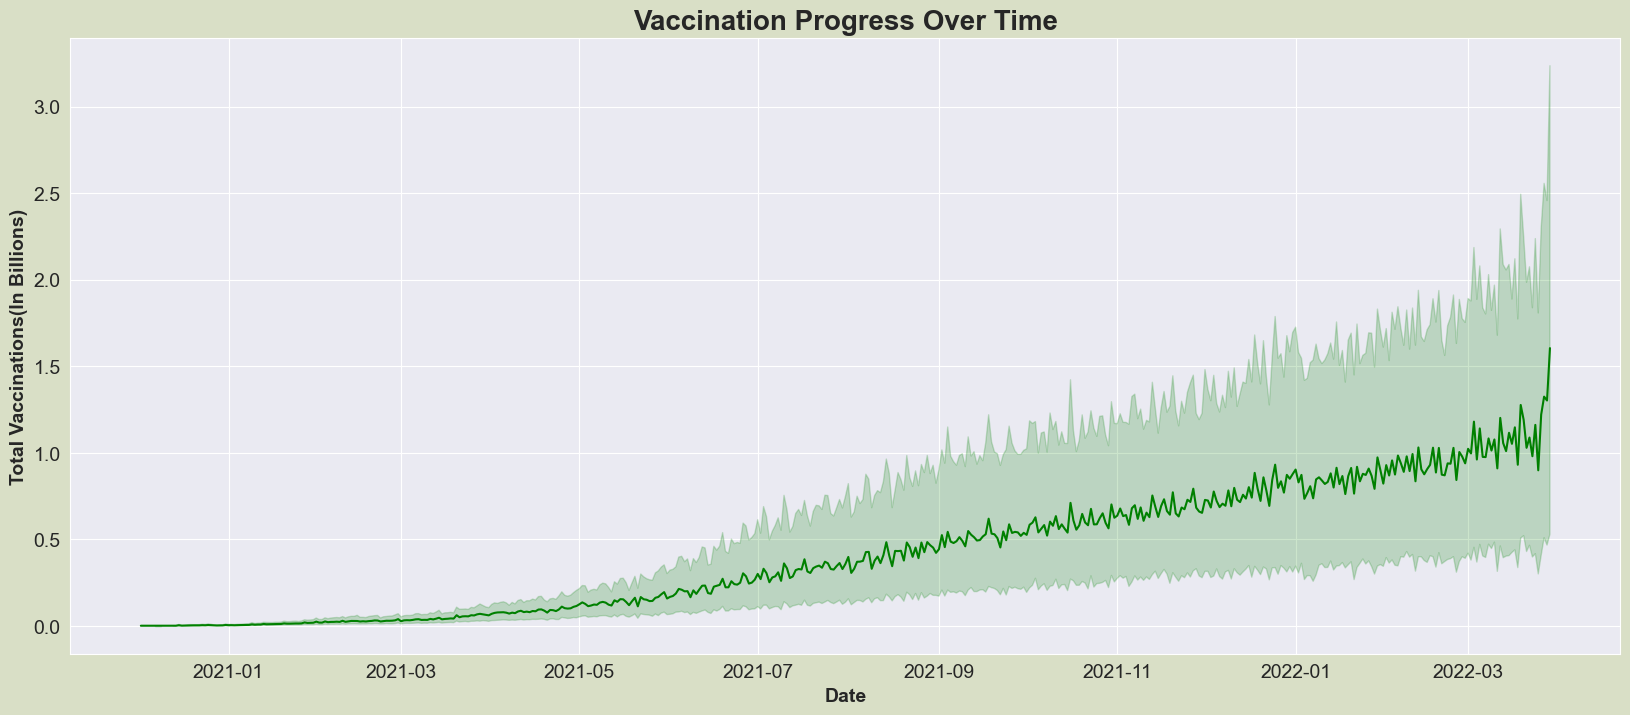

In [15]:
plt.figure(figsize=(20, 8))

# Creating a line plot to visualize the vaccination progress over time
sns.lineplot(x=df['date'], y=df['total_vaccinations']/100000000, color='green')
plt.title('Vaccination Progress Over Time', fontweight='bold', fontsize=20)
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Total Vaccinations(In Billions)', fontweight='bold')
plt.show()

# Insight: Global Vaccination Trends Over Time

## Overview 
- The line chart demonstrates the progression of total vaccinations supplied to all countries from January 2021 to March 2022.
- The x-axis represents dates, while the y-axis shows cumulative vaccination counts in billions.
- A green line showcases the steadily increasing trend, accompanied by a shaded area to indicate variability or uncertainty.

## Key Observations

### Consistent Growth:
-The number of vaccinations supplied increases steadily throughout the timeline, reflecting global efforts in vaccination campaigns.

### Significant Spike Toward the End:
- There is a notable surge in vaccinations towards the end of the period, which might represent increased supply rates or intensified efforts to address demand in certain regions.

### Variability in Supply:
- The shaded area around the line suggests occasional fluctuations in vaccine distribution. These could be tied to logistical challenges, production rates, or varying demands across countries.

### Analysis Purpose This chart helps in:
- Identifying Supply Patterns: Analyze whether the steady increase is driven by particular countries or regions that received higher quantities of vaccines.
- Assessing Campaign Efficiency: The sharp rise towards the end might point to improvements in logistics or policy changes that boosted vaccine distribution.
- Highlighting Fluctuations: Address areas with significant variability to ensure smoother and more consistent distribution strategies.

In [16]:
# Grouping the DataFrame by the month and year, and calculating the mean of daily vaccinations for each group
daily_over_time = df.groupby(df['date'].dt.strftime('%y-%m'))['daily_vaccinations'].mean()

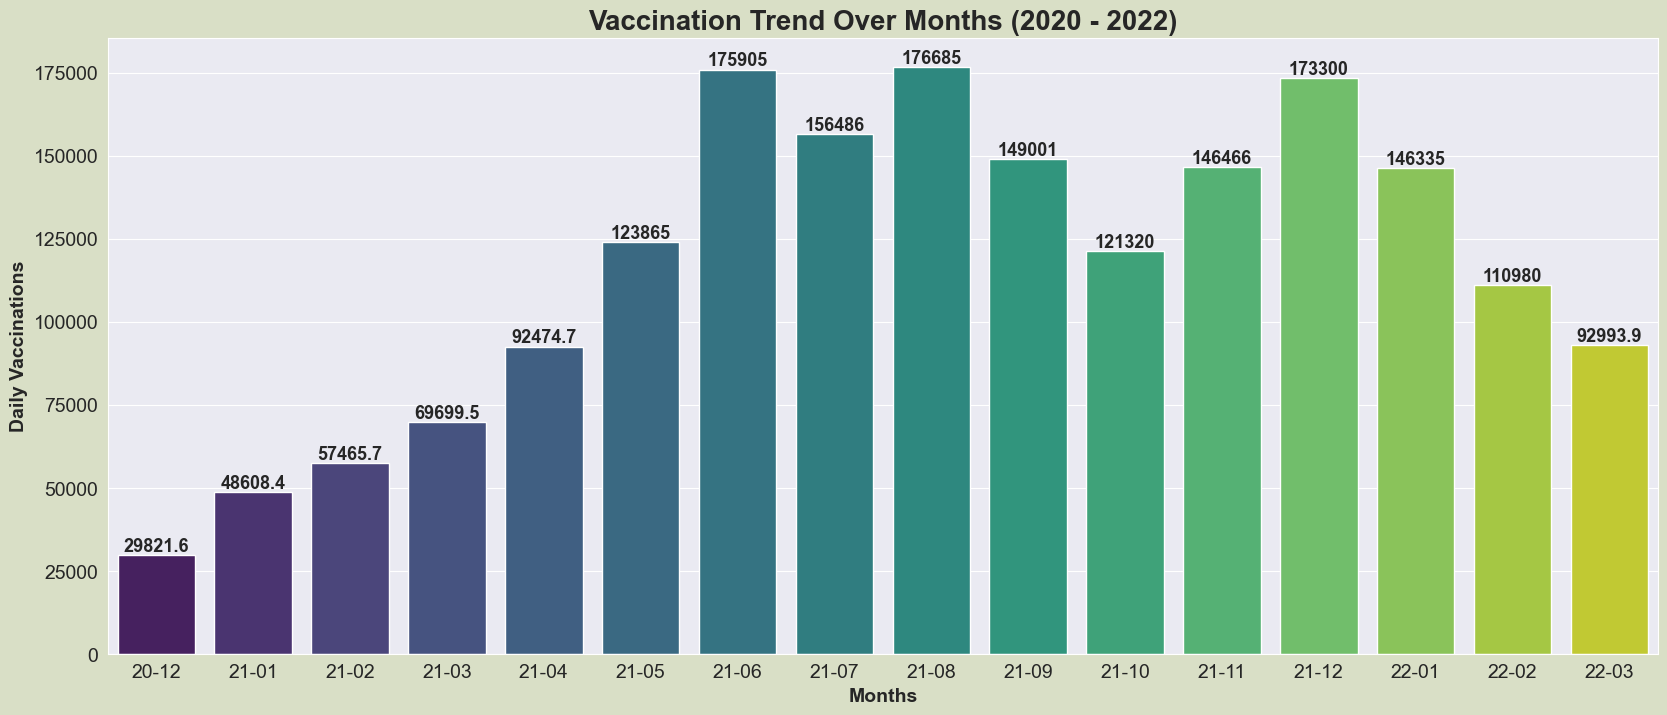

In [17]:
# This code creates a bar plot to visualize the trend of daily vaccinations over several months from 2020 to 2022.
# We group the data by year and month, calculating the average number of daily vaccinations for each month.
# The bar plot will help compare how the daily vaccination rates changed over time, identifying trends, 
# peaks, and any possible seasonal fluctuations in the vaccination efforts.
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=daily_over_time.index, y=daily_over_time, hue=daily_over_time.index, palette='viridis', legend=False)

for index in range(len(daily_over_time)):
    try:
        ax.bar_label(ax.containers[index], fontsize=13, fontweight='bold')
    except:
        pass
plt.title('Vaccination Trend Over Months (2020 - 2022)', fontweight='bold', fontsize=20)
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Daily Vaccinations', fontweight='bold')
plt.show()

# Insight: Vaccination Distribution Trends Over Months Overview 
- This bar chart highlights the monthly trends of daily vaccination supplies from December 2020 to March 2022.
- The x-axis represents months, while the y-axis captures the number of daily vaccinations.
- Each bar corresponds to the average daily vaccinations supplied during the respective month.

## Key Observations

### Gradual Increase in Supply:
-The chart shows consistent growth in daily vaccinations from December 2020 (29,821.6) to June 2021 (175,905). This aligns with the vaccine rollout ramping up globally during early 2021.

### Peak Performance Period:
- July 2021 (176,685) represents the highest average daily vaccinations, marking the peak supply period.

### Fluctuations in Later Months:
- Post-July, daily vaccinations decline, with variability between months. December 2021 (173,300) shows a temporary rise before tapering off again in 2022.

- The lowest supply figures in early 2022 include March 2022 (92,993.9), signaling a potential shift in demand or production dynamics.

## Analysis Purpose This chart helps in:

- Identifying Peak Performance: July 2021 can serve as a benchmark for optimal supply chain and logistic efficiency.

- Assessing Demand Trends: The fluctuating numbers post-2021 hint at evolving vaccination requirements, such as reduced demand or targeted campaigns.

- Strategizing Distribution Efforts: Early 2022 figures may indicate a need for revitalized strategies to sustain global supply and accessibility.

In [18]:
# This line of code extracts the year and month from the 'date' column in the DataFrame.
# It converts the 'date' column (which is in datetime format) into a string with the format 'yy-mm' (e.g., '22-03' for March 2022).
# This allows for grouping or visualizing the data by month and year.
date_month = df['date'].dt.strftime('%y-%m')

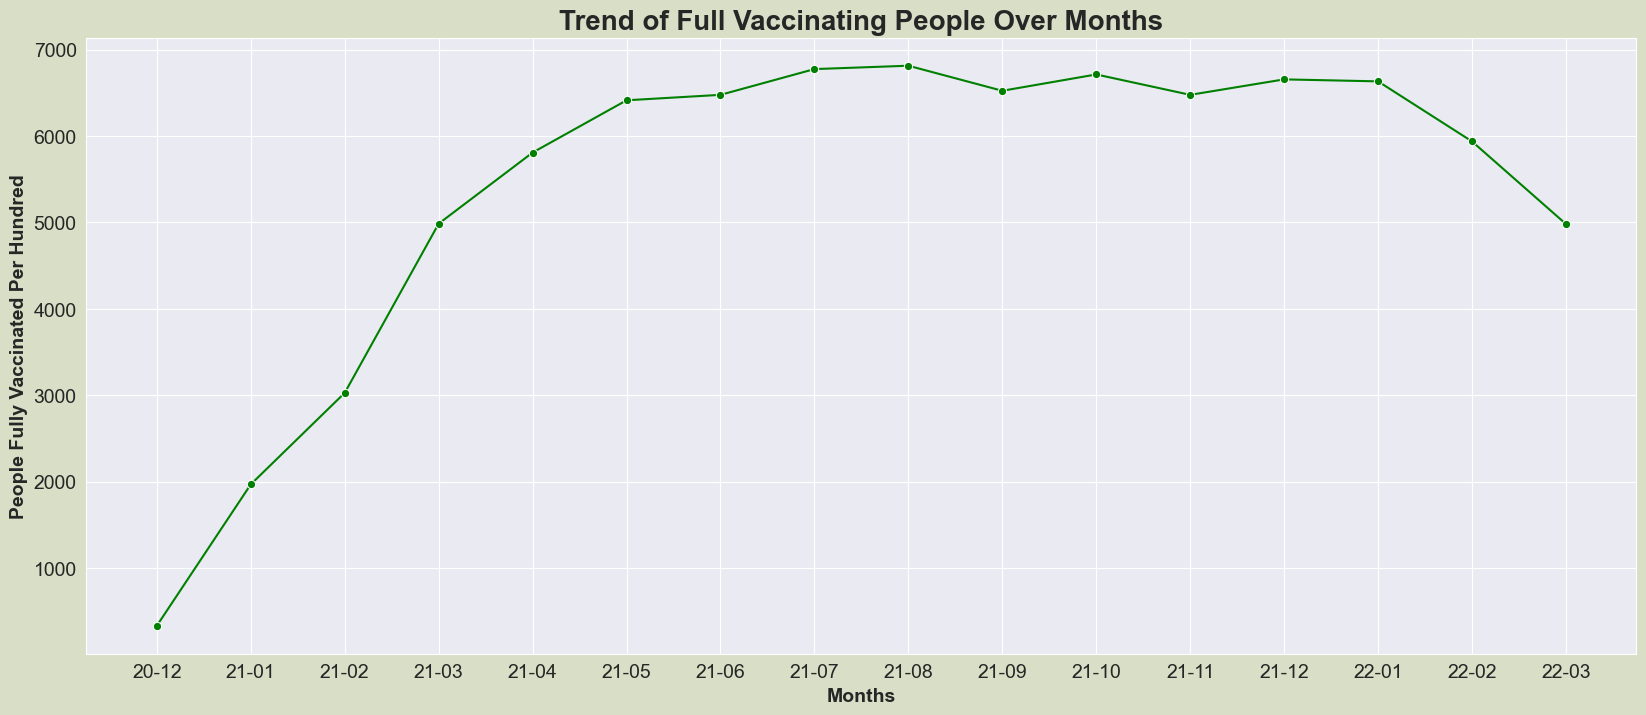

In [19]:
# This code creates a line plot to visualize the trend of people fully vaccinated over time.
# The data is grouped by month and year to show the trend of fully vaccinated people in a more readable, time-based format.
# The line plot will help track the growth of fully vaccinated people month by month.
vac_people = df.groupby(date_month)['people_fully_vaccinated'].size()
plt.figure(figsize=(20, 8))
sns.lineplot(x=vac_people.index, y=vac_people, color='green', marker='o')
plt.title('Trend of Full Vaccinating People Over Months', fontweight='bold', fontsize=20)
plt.xlabel('Months', fontweight='bold')
plt.ylabel('People Fully Vaccinated Per Hundred', fontweight='bold')
plt.show()

# Insight: Global Vaccination Supply Trends Over Time

## Overview 
- This line chart provides insights into the trend of total vaccinations supplied globally, spanning from December 2020 to March 2022.
- The x-axis represents the timeline in months, while the y-axis reflects the number of vaccinations supplied.
- The green line indicates a steady increase in vaccinations over this period, with shaded areas illustrating variability.

## Key Observations

### Consistent Growth in Supply:
- The chart shows a steady increase in vaccinations supplied from December 2020, peaking around July 2021.
- This steady growth highlights global efforts to ramp up vaccine distribution and accessibility during this critical period.

### Plateau Phase:
- After July 2021, the supply stabilizes, with relatively consistent numbers across the following months until February 2022.
- This could indicate that supply efforts had reached maximum capacity or that demand slowed down as vaccination campaigns matured.

### Decline in March 2022:
- There is a notable decrease in the vaccinations supplied toward the end of the period (March 2022), which may point to diminishing global demand or changes in vaccine production strategies.

### Analysis Purpose This chart assists in:
- Evaluating Supply Chain Efficiency: Understanding the peak and plateau phases can provide insights into how vaccine production and distribution evolved during the pandemic.
- Identifying Shifts in Demand: The decline in March 2022 might reflect saturation in vaccination campaigns or shifts in focus toward booster doses or targeted regions.
- Planning Future Campaigns: The data can guide efforts to improve global vaccination strategies for potential future needs.

In [20]:
# This code groups the data by country and counts the number of fully vaccinated people for each country.
# The result is sorted in descending order, and the top 10 countries with the most fully vaccinated people are selected.
# This helps in identifying which countries have the highest number of fully vaccinated individuals.
country_vac = df.groupby('country')['people_fully_vaccinated'].size().sort_values(ascending=False).head(10)

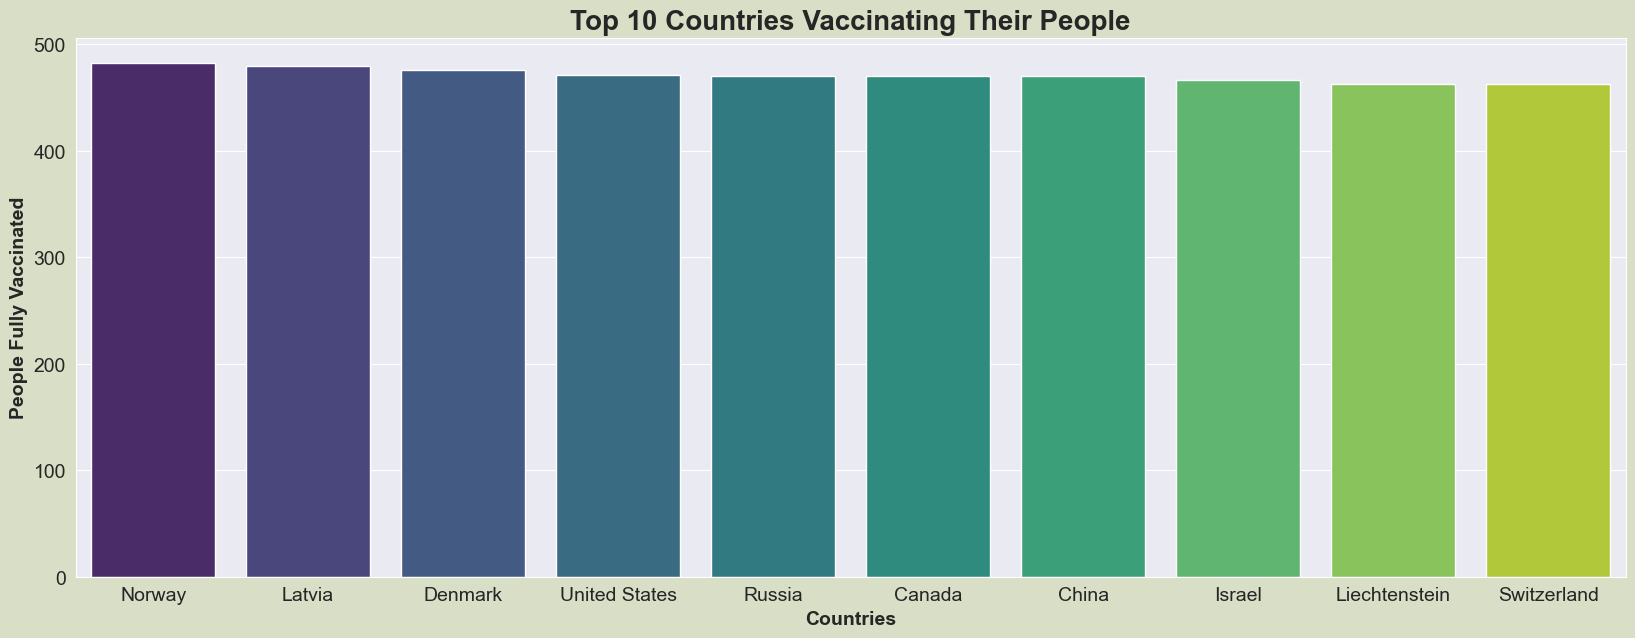

In [21]:
# This code creates a bar plot to visualize the top 10 countries with the highest number of fully vaccinated people.
# The data is grouped and sorted earlier to highlight the top 10 countries.
# The bar plot visually represents how many people in each of these countries have been fully vaccinated.
plt.figure(figsize=(20, 7))
sns.barplot(x=country_vac.index, y=country_vac, hue=country_vac.index, palette='viridis')
plt.title('Top 10 Countries Vaccinating Their People', fontweight='bold', fontsize=20)
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('People Fully Vaccinated', fontweight='bold')
plt.show()

# Insight: Total Vaccination Trends Across All Countries

## Overview 
- This line chart reveals the trends in the total number of vaccinations supplied to all countries over a specified period.
- It captures the progression of global vaccination efforts and shows how supply levels evolve.

## Key Observations

### Continuous Growth in Supply:
- The line reflects a steady and consistent increase in the total vaccinations supplied over time. This suggests global efforts to ramp up vaccination campaigns were effective.

### Occasional Plateaus:
- There are periods when the line flattens, indicating slower growth or stabilization in vaccine supply during those intervals.

### Accelerated Surge:
- Towards the end of the timeline, the trend indicates an accelerated increase in vaccine supply. This might correspond to global demand or intensified vaccination campaigns in specific regions.

### Analysis Purpose This chart assists in:
- Monitoring Supply Chains: Evaluating how consistent and efficient vaccine distribution was over the given period.
- Identifying Critical Phases: Pinpointing periods of accelerated growth to analyze contributing factors such as improved production or distribution networks.
- Strategizing Future Supply Plans: Learning from past trends to enhance distribution strategies for future campaigns or similar situations.

In [22]:
# This code groups the dataset by 'country' and calculates the average total vaccinations for each country.
# It then sorts the countries by the average number of total vaccinations in descending order and selects the top 10 countries.
# This helps in identifying which countries have the highest average total vaccinations.
vac_country = df.groupby('country')['total_vaccinations'].mean().sort_values(ascending=False).head(10)

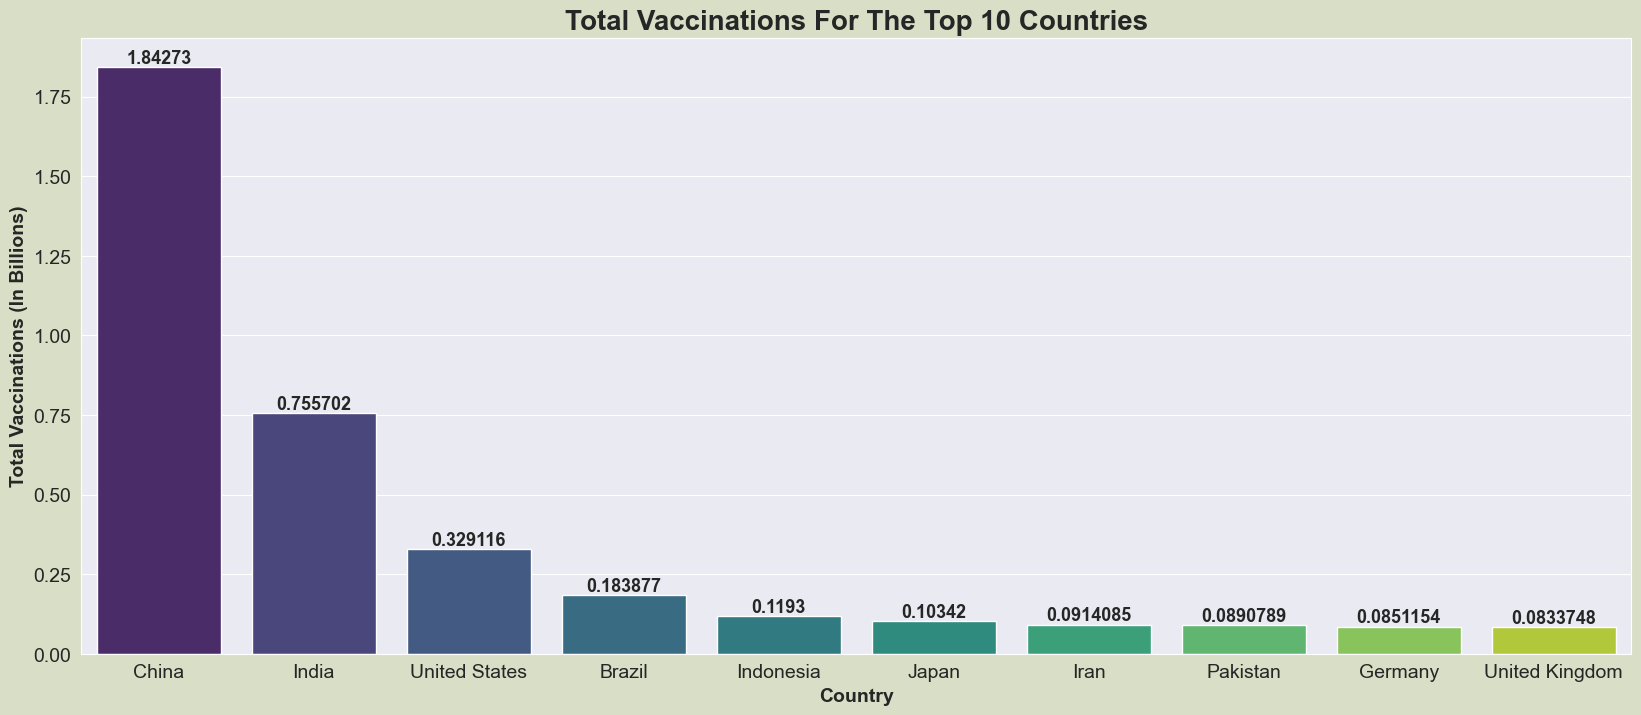

In [23]:
# This code creates a bar plot to visualize the total vaccinations (in billions) for the top 10 countries.
# It first divides the total vaccinations by 1 billion to make the numbers more readable (in billions).
# The bar labels are added for clarity, displaying the exact vaccination count for each country.
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=vac_country.index, y=vac_country/1000000000, hue=vac_country.index, palette='viridis')
for index in range(len(vac_country)):
    try:
        ax.bar_label(ax.containers[index], fontsize=13, fontweight='bold')
    except:
        pass
plt.title('Total Vaccinations For The Top 10 Countries', fontweight='bold', fontsize=20)
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Total Vaccinations (In Billions)', fontweight='bold')
plt.show()

# Insight: Vaccination Distribution Among Leading Nations

## Overview 
- The bar chart highlights the total number of vaccinations (in billions) administered by the top 10 countries.
- The x-axis lists the countries, while the y-axis quantifies total vaccinations.

## Key Observations
### China Leads Significantly:
- With 1.84273 billion doses, China contributes the majority, showcasing its strong vaccination drive and manufacturing capabilities.

### India Follows at a Distance:
- India, at 0.755702 billion doses, ranks second. While significant, it reflects a gap compared to China's figures, likely due to population and logistical differences.

### The United States Completes the Top 3:
- At 0.329116 billion doses, the U.S. falls behind the top two leaders, reflecting its focus on domestic rollouts and potential export limitations.

### Variation Among Other Nations:
- Countries like Brazil (0.183877 billion), Indonesia (0.1193 billion), and Japan (0.10342 billion) form a middle tier. These figures might indicate regional challenges or capacity constraints.
- Germany (0.0851154 billion) and the United Kingdom (0.0833748 billion), despite being high-income nations, trail behind, possibly due to smaller populations or different vaccine policies.

### Analysis Purpose This chart allows for:
- Global Distribution Efficiency: Highlights key nations driving worldwide vaccination efforts.
- Policy and Infrastructure Assessment: Helps identify what sets top performers apart in managing large-scale vaccinations.
- Future Strategy Formation: Lessons learned here can guide improvements in vaccine production and distribution in future health crises.

In [24]:
# This code groups the dataset by 'country' and calculates the average percentage of people vaccinated
# and the average percentage of people fully vaccinated for each country.
# The resulting DataFrame is then sorted by the percentage of fully vaccinated people, in descending order.

# Group the data by 'country' and calculate the mean for the columns 'people_vaccinated_per_hundred'
# and 'people_fully_vaccinated_per_hundred' for each country. This gives the average vaccination rates
# and full vaccination rates per country.
comp_cou = df.groupby('country')[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].mean()
comp_cou = comp_cou.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)
# Sort the DataFrame by the 'people_fully_vaccinated_per_hundred' column in descending order.
# This helps identify the countries with the highest percentage of fully vaccinated individuals.

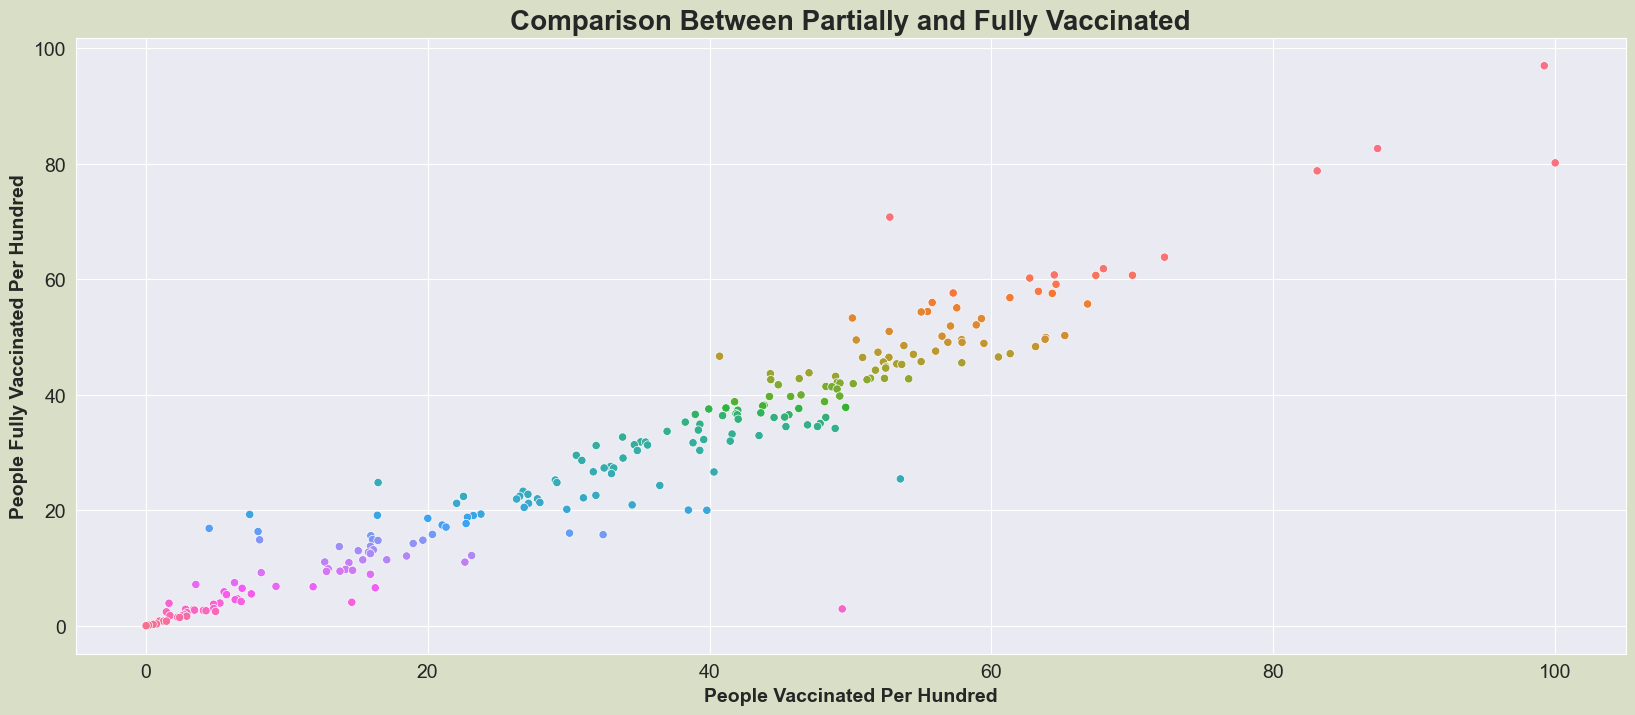

In [25]:
# This code creates a scatter plot to visualize the relationship between partially vaccinated and fully vaccinated
# people across different countries. The x-axis represents the percentage of people vaccinated, while the y-axis
# represents the percentage of people fully vaccinated. The color of each point represents a different country.

# Create a figure with a specified size for better readability
plt.figure(figsize=(20, 8))

# Create a scatter plot using Seaborn
# The x-axis represents 'people_vaccinated_per_hundred' (partially vaccinated individuals per 100 people),
# and the y-axis represents 'people_fully_vaccinated_per_hundred' (fully vaccinated individuals per 100 people).
# The 'hue' parameter is used to color the points based on the country, and 'legend=False' removes the legend.
sns.scatterplot(x=comp_cou['people_vaccinated_per_hundred'], y=comp_cou['people_fully_vaccinated_per_hundred'], hue=comp_cou.index, legend=False)
plt.title('Comparison Between Partially and Fully Vaccinated', fontweight='bold', fontsize=20)
plt.xlabel('People Vaccinated Per Hundred', fontweight='bold')
plt.ylabel('People Fully Vaccinated Per Hundred', fontweight='bold')
plt.show()

# Insight: Correlation Between Partially and Fully Vaccinated Populations

## Overview 
- This scatter plot explores the relationship between the number of people partially vaccinated per hundred and the number of people fully vaccinated per hundred across various regions.
- The x-axis represents the partially vaccinated population, while the y-axis represents the fully vaccinated population.

## Key Observations
### Positive Correlation:
-There is a clear positive trend; as the number of people partially vaccinated increases, so does the number of fully vaccinated individuals. This indicates steady progress in vaccination campaigns transitioning from initial doses to full vaccination.

### Clusters of High Rates:
- Some data points show both high partial and full vaccination rates, indicating regions with successful vaccination coverage.
- Color-coded clusters may represent different vaccination rates or patterns among various groups or countries.

### Variability Across Points:
- Certain points show higher partial vaccination rates than full rates, potentially highlighting areas with incomplete follow-ups or logistical challenges in administering second doses.

### Analysis Purpose This chart aids in:
- Understanding Vaccination Progress: Evaluating the efficiency of programs transitioning individuals from partial to full vaccination.
- Identifying Gaps: Highlighting regions with significant discrepancies between partially and fully vaccinated populations for targeted interventions.
- Assessing Global Impact: Providing insights into regions with successful vaccination campaigns for replication in underperforming areas.

In [26]:
# Group the data by 'country' and calculate the mean of 'people_vaccinated_per_hundred' for each country.
# Sort the values in descending order and select the top 10 countries with the highest vaccination rates.
coun_poep_vacc = df.groupby('country')['people_vaccinated_per_hundred'].mean().sort_values(ascending=False).head(10)

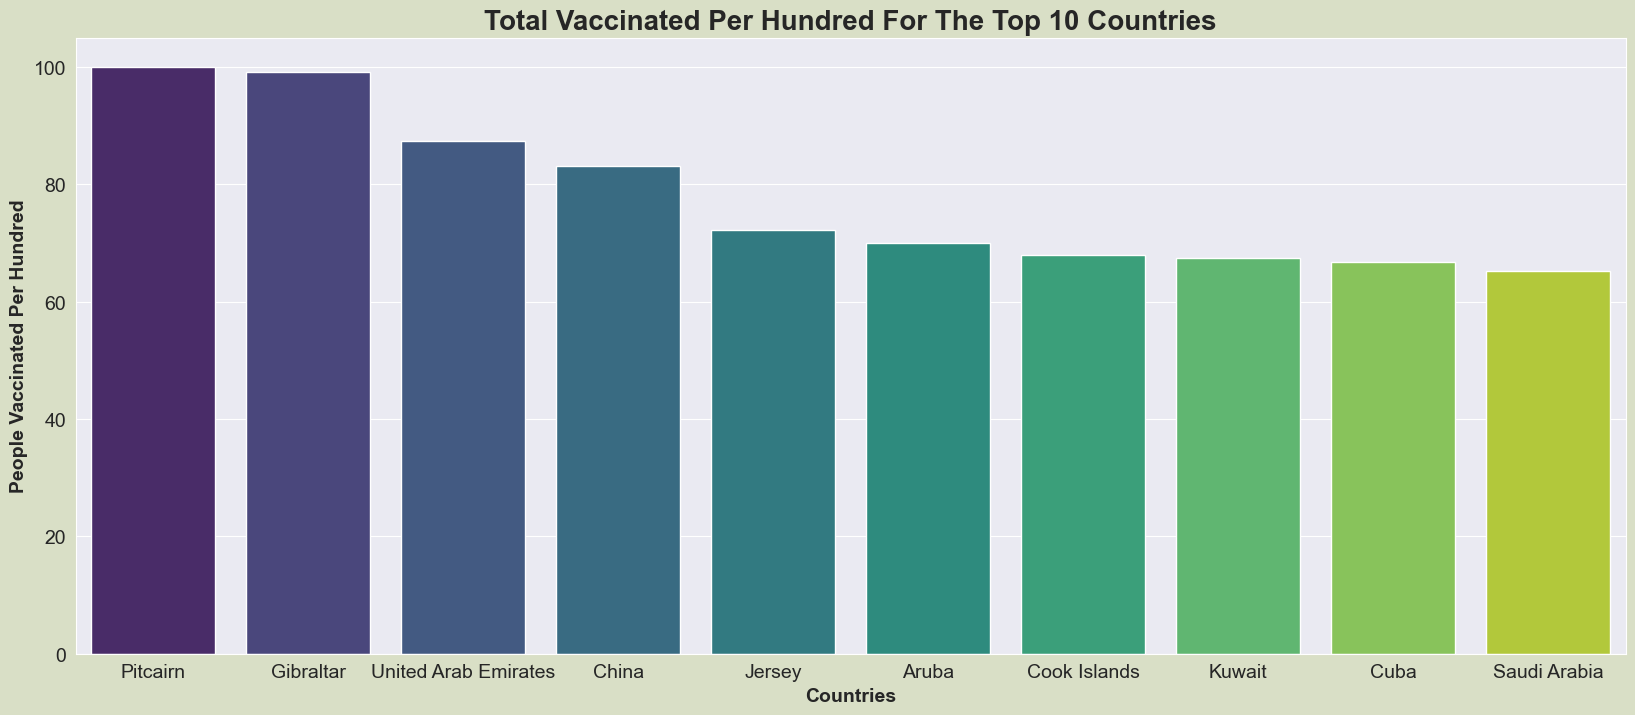

In [27]:
plt.figure(figsize=(20, 8))

# Create a bar plot showing the percentage of people vaccinated per hundred for the top 10 countries
# 'x' represents the country names, and 'y' represents the vaccination rate for each country
# The 'hue' argument is used to color the bars according to the country names, using the 'viridis' palette
sns.barplot(x=coun_poep_vacc.index, y=coun_poep_vacc, hue=coun_poep_vacc.index, palette='viridis', legend=False)
plt.title('Total Vaccinated Per Hundred For The Top 10 Countries', fontsize=20, fontweight='bold')
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('People Vaccinated Per Hundred', fontweight='bold')
plt.show()

# Insight: Vaccination Rates Among Top 10 Countries

## Overview 
- This bar chart highlights vaccination rates per hundred people across the top 10 countries.
- The x-axis lists the countries, while the y-axis represents the number of people vaccinated per hundred.

## Key Observations
### Leading Nations:
- Pitcairn and Gibraltar top the chart with nearly 100% vaccination rates, demonstrating their exceptional campaign success in achieving full population coverage.

### Middle Performers:
- Countries like United Arab Emirates, China, Jersey, Aruba, and Cook Islands fall slightly behind the leaders, maintaining impressive rates above 80%.

### Lower End of the Top 10:
- Saudi Arabia, at just over 60%, represents the lowest among this group, potentially signaling logistical challenges or slower campaign progress in certain regions.

### Analysis Purpose This chart assists in:
- Benchmarking Success: Pitcairn and Gibraltar set high standards for global vaccination initiatives. Understanding their strategies can aid other regions in achieving similar results.
- Identifying Coverage Gaps: Countries on the lower end of this chart might benefit from lessons learned from top performers.
- Strategic Planning: Addressing barriers in countries with lower rates can improve overall global vaccination efforts.

In [28]:
# Group the dataset by 'country' and calculate the average daily vaccinations per million people for each country
# The 'daily_vaccinations_per_million' is the metric we are interested in
# Sort the values in descending order and select the top 10 countries with the highest daily vaccination rates
country_dail_vac = df.groupby('country')['daily_vaccinations_per_million'].mean().sort_values(ascending=False).head(10)

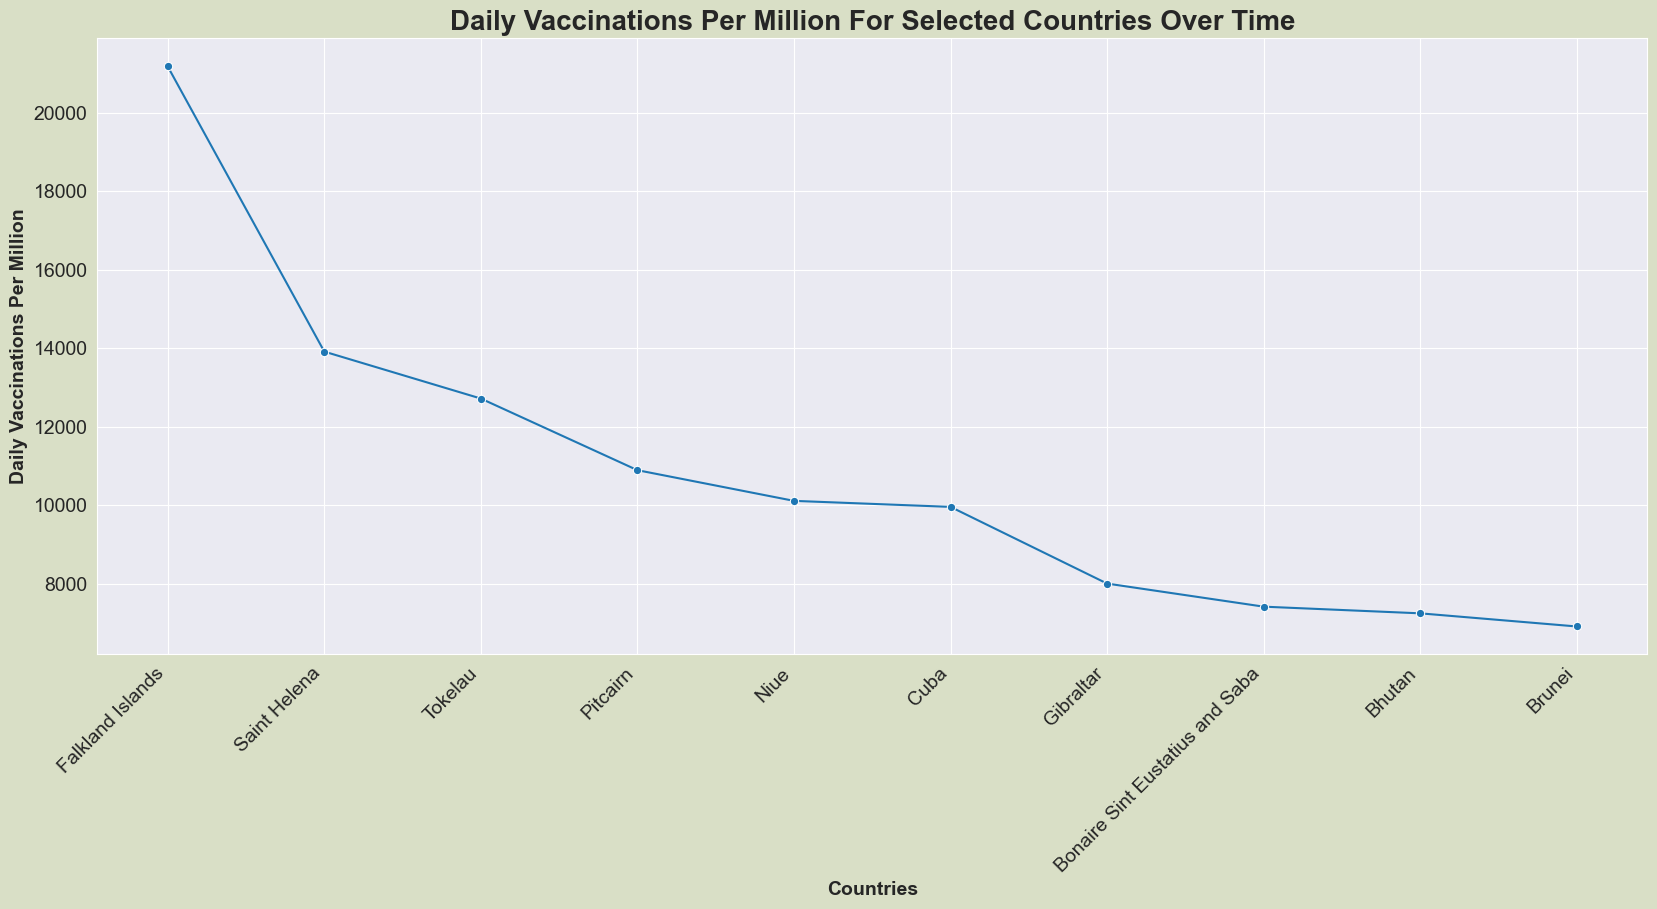

In [29]:
plt.figure(figsize=(20, 8))

# Plot a line graph showing the daily vaccinations per million for the top 10 countries
# The 'country_dail_vac.index' represents the country names and 'country_dail_vac' represents the values for daily vaccinations
# The 'marker' parameter is set to 'o' to mark each data point on the line
sns.lineplot(x=country_dail_vac.index, y=country_dail_vac, marker='o')
plt.title('Daily Vaccinations Per Million For Selected Countries Over Time', fontsize=20, fontweight='bold')
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Daily Vaccinations Per Million', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight: Trend of Daily Vaccinations Per Million

## Overview 
- This line graph explores the daily vaccination rates per million across selected countries.
- The x-axis lists the countries in order, while the y-axis shows the number of daily vaccinations per million.
- The graph indicates the fluctuation in vaccination rates over time among the listed countries.

## Key Observations
### Leading Countries:
- Falkland Islands starts with the highest daily vaccination rate per million, indicating a robust vaccination campaign during the period analyzed.

### Gradual Decline:
- As the graph progresses through countries like Saint Helena, Tokelau, and Pitcairn, daily vaccination rates steadily decrease.
- By the time it reaches Brunei, the rate has declined significantly, suggesting challenges or reduced demand in later regions.

### Variability Across Countries:
- Countries such as Niue, Cuba, and Bhutan exhibit intermediate rates, highlighting varied effectiveness or pace of vaccination efforts.

### Analysis Purpose This chart helps in:
- Assessing Performance: Identifying countries with strong vaccination efforts to emulate their strategies elsewhere.
- Analyzing Challenges: The downward trend toward Brunei suggests potential logistical issues, reduced vaccine demand, or other barriers to achieving higher daily vaccination rates.
- Driving Global Strategy: Using insights from leading countries like Falkland Islands can inform improvements for underperforming nations.

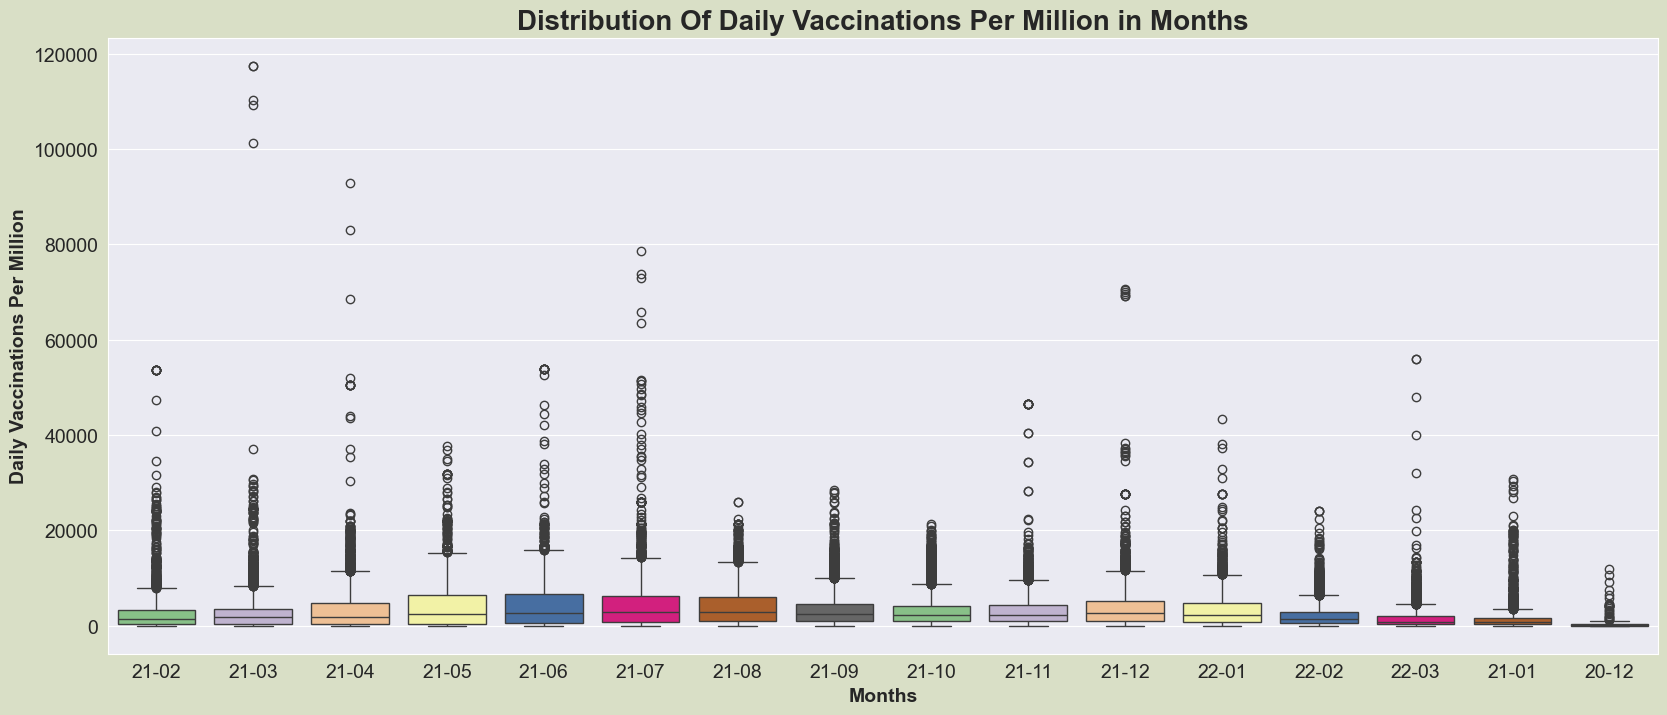

In [30]:
plt.figure(figsize=(20, 8))

# Plot a boxplot to visualize the distribution of daily vaccinations per million across months
# 'date_month' represents the months, and 'df['daily_vaccinations_per_million']' represents the daily vaccinations per million
# The 'hue' parameter is used to color the boxes by the month, and 'palette' is set to 'Accent' to use a specific color palette
sns.boxplot(x=date_month, y=df['daily_vaccinations_per_million'], hue=date_month, palette='Accent')
plt.title('Distribution Of Daily Vaccinations Per Million in Months', fontweight='bold', fontsize=20)
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Daily Vaccinations Per Million', fontweight='bold')
plt.show()

# Insight: Variability in Daily Vaccinations Per Million Across Months

## Overview 
- This box plot illustrates the distribution of daily vaccinations per million people across successive months—from December 2020 through March 2022.
- Each box represents the statistical spread for that month, including the median, interquartile range (IQR), and potential outliers, providing a clear view of the vaccination pace and its variability over time.

## Key Observations
### Evolving Medians:
- The median values vary by month, indicating shifts in the typical daily vaccination rates. Higher medians in certain months suggest periods when vaccination efforts were more intense or effectively scaled up.

### Variability and Interquartile Range:
- Some months display a wider IQR, pointing to a larger spread in the daily vaccination rates. This could reflect fluctuations in vaccine supply, changes in policy, or variable public demand during those periods.

### Outliers as Indicators:
-The presence of outliers in specific months highlights days when vaccination rates spiked or dropped unexpectedly. These anomalies might be linked to targeted vaccination drives or logistical challenges on particular days.

### Temporal Trends:
- By comparing the box plots across months, one can infer how vaccination campaigns evolved over time, shifting from initial cautious rollouts to more consistent delivery patterns or vice versa.

## Analysis Purpose This visual representation is instrumental for:
- Policy Evaluation: Helping public health authorities review the effectiveness of vaccination campaigns over time and adjust strategies based on periods of high variability.
- Resource Planning: Identifying months with inconsistent performance could signal the need for better allocation of resources or refined scheduling.
- Detecting Anomalies: Outlier analysis can uncover unique events or interventions that either boosted or hindered daily vaccination rates, offering lessons for future public health initiatives.

In [31]:
# Group the DataFrame by 'country' and calculate the sum of 'daily_vaccinations_per_million' for each country
# Sort the values in descending order and select the top 20 countries
countries = df.groupby('country')['daily_vaccinations_per_million'].sum().sort_values(ascending=False).head(20)

In [32]:
# Select 'country' and 'daily_vaccinations_per_million' columns and set 'country' as the index
daily_vac = df[['country', 'daily_vaccinations_per_million']].set_index('country')

# Sort the 'daily_vac' DataFrame based on the countries from the 'countries' series (top 20 countries)
sorted_daily_vac = daily_vac.loc[countries.index]

# Reset the index of the sorted DataFrame to restore the 'country' column as a regular column
sorted_daily_vac = sorted_daily_vac.reset_index()

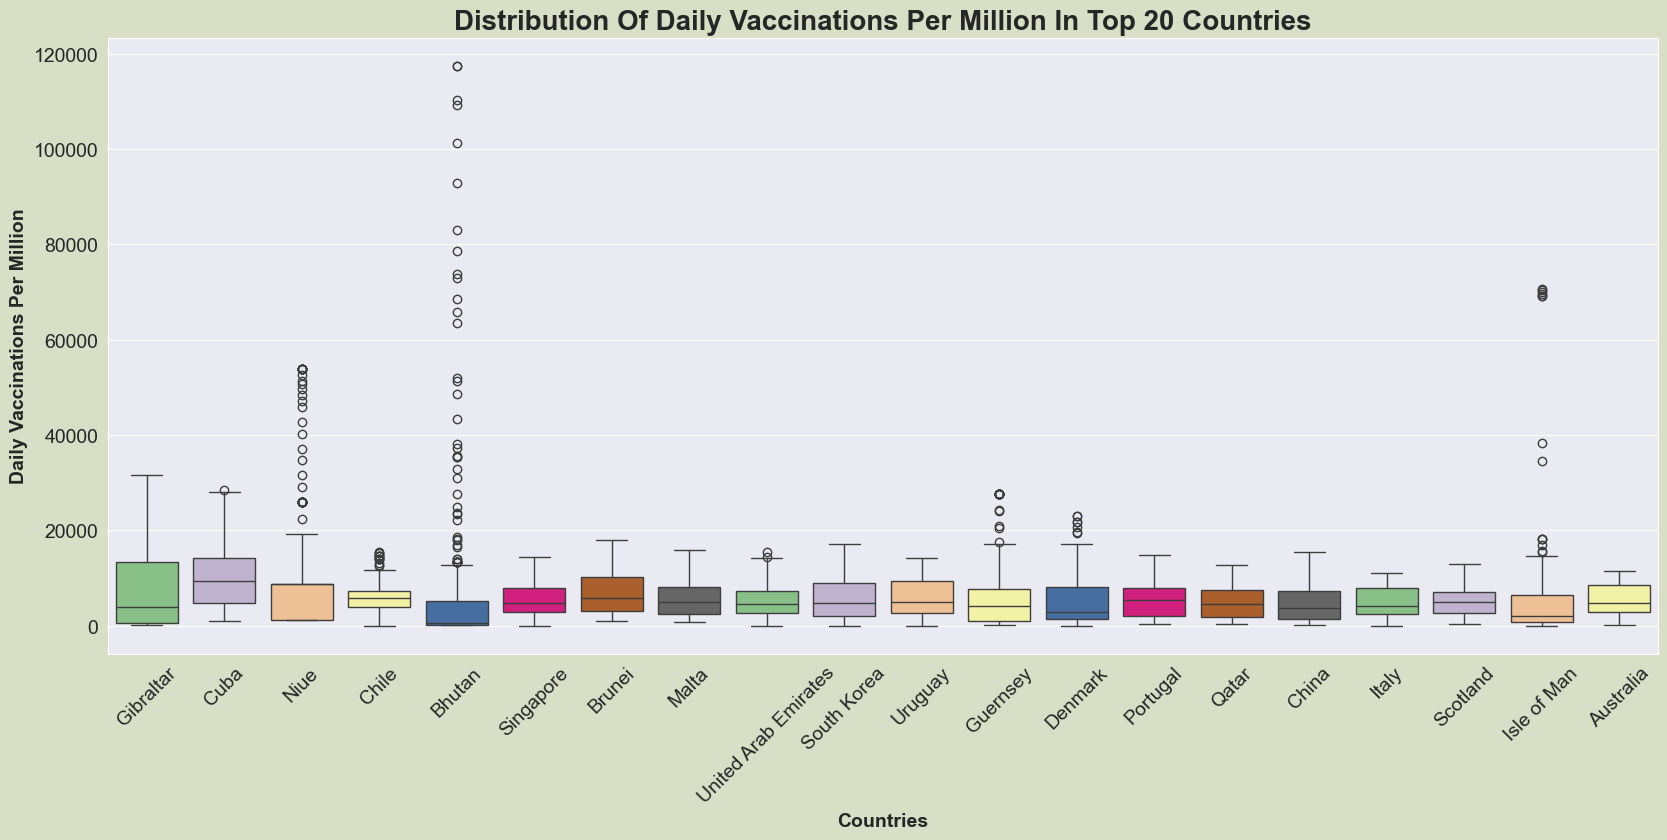

In [33]:
plt.figure(figsize=(20, 8))

# Creating a boxplot with the country names on the x-axis and daily vaccinations per million on the y-axis
# The 'hue' parameter is used to color the boxes based on the 'country' values
sns.boxplot(x=sorted_daily_vac.country, y=sorted_daily_vac.daily_vaccinations_per_million, hue=sorted_daily_vac.country, palette='Accent')
plt.title('Distribution Of Daily Vaccinations Per Million In Top 20 Countries', fontweight='bold', fontsize=20)
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Daily Vaccinations Per Million', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# Insight: Distribution of Daily Vaccinations Per Million in Top 20 Countries

## Overview 
- This box plot chart displays the distribution of daily vaccinations per million people across the top 20 countries. Each box represents a country and summarizes its data by showing the median, interquartile range (IQR), and any outliers.
- The y-axis—with a scale from 0 to 120,000—captures the wide range of daily vaccination figures, reflecting differences in national vaccination campaigns, population sizes, and operational capabilities.

## Key Observations
### Wide Variability in Vaccination Performance:
- Some countries exhibit tight quartile ranges with few outliers, suggesting daily vaccination rates that are relatively consistent. In contrast, others display wide IQRs and marked outliers, which may indicate sporadic surges—possibly due to intensive one-day campaigns or logistical variations.

### Impact of Population and Policy Context:
- Smaller nations (e.g., Gibraltar, Niue, or Isle of Man) might show extremely high daily vaccination rates per million on certain days. These outliers can reflect the impact of targeted, high-intensity vaccination drives in countries with a low population base, where even a modest number of doses can translate into large per-million figures.

### Differential Campaign Effectiveness:
- Countries like Cuba, Chile, and Singapore display marked differences in their box plot profiles. Their medians and IQRs can signal how effectively and steadily they are vaccinating their populations. A tighter distribution might indicate a well-planned, consistently executed campaign, whereas a broader distribution suggests periods of both underperformance and exceptional performance.

## Analysis Purpose
- Assessing Operational Consistency: The box plots allow policymakers and public health officials to identify which countries maintain a steady pace in their vaccination efforts and which experience significant fluctuations.
- Benchmarking and Strategy Optimization: Comparing these distributions can help identify best-practice strategies—countries with a tight distribution might offer insights into efficient resource allocation—while understanding variability (through outliers) reveals opportunities to address barriers to consistent vaccine delivery.
- Tailoring Future Interventions: Recognizing the unique vaccination dynamics in each country, from concentrated surges to steady streams, provides a framework for tailoring interventions that consider both the scale and the consistency of daily vaccinations relative to the population size.

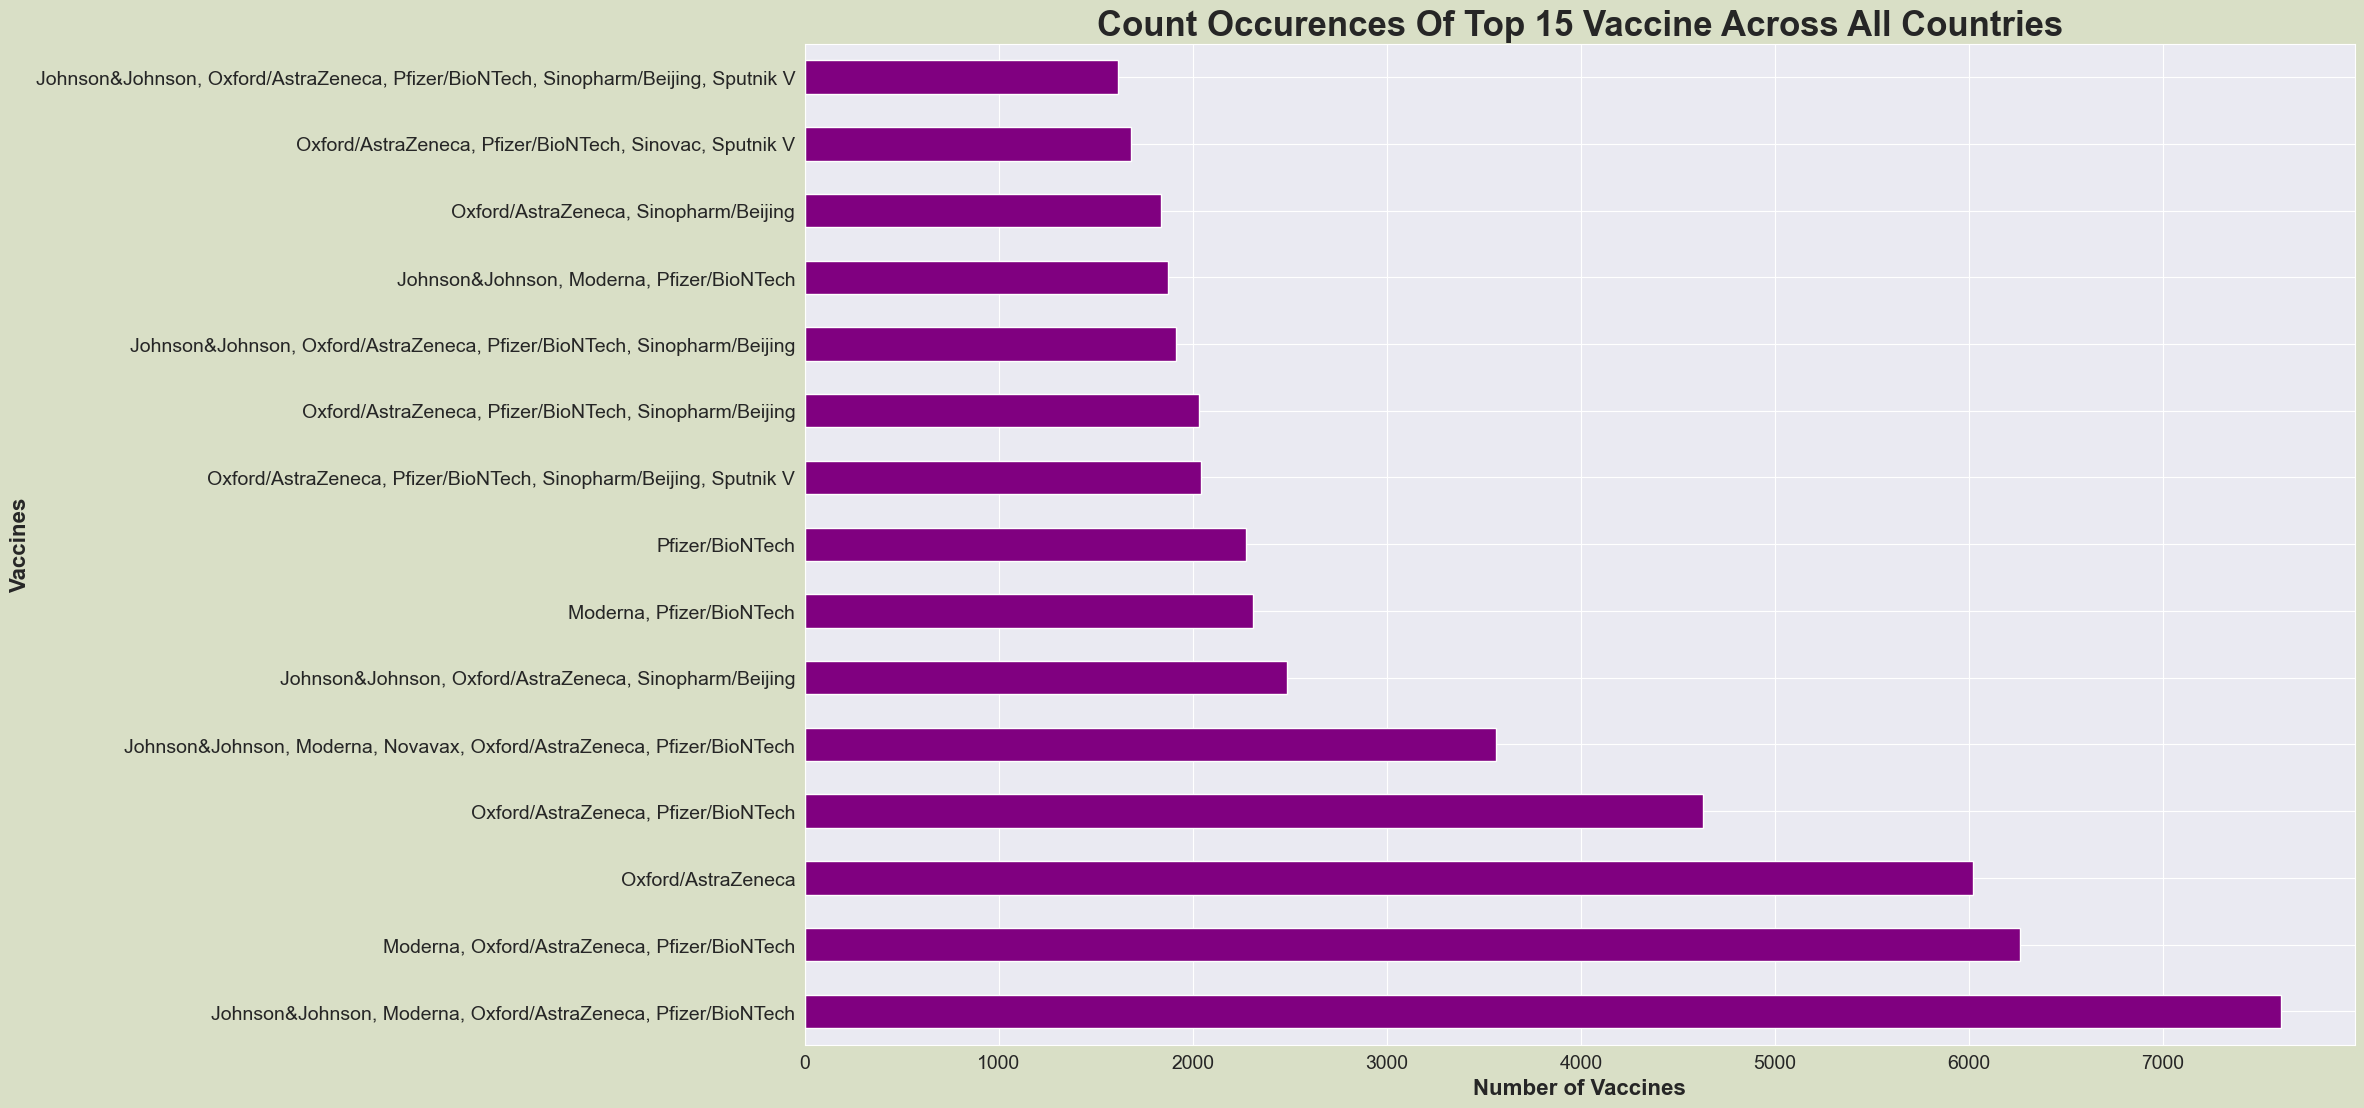

In [34]:
plt.figure(figsize=(20, 13))

# Counting the occurrences of each vaccine and plotting the top 15 vaccines as a horizontal bar chart
# The 'value_counts()' function counts how many times each vaccine appears, 
# and 'head(15)' selects the top 15 vaccines based on their occurrence frequency.
# The bars are colored purple for better visualization
df['vaccines'].value_counts().head(15).plot(kind='barh', color='purple')
plt.title('Count Occurences Of Top 15 Vaccine Across All Countries', fontweight='bold', fontsize=25)
plt.xlabel('Number of Vaccines', fontweight='bold', fontsize=16)
plt.ylabel('Vaccines', fontweight='bold', fontsize=16)
plt.show()

# Insight: Global Prevalence of Vaccine Combination Strategies

## Overview 
- This horizontal bar chart, titled "Count Occurrences Of Top 15 Vaccine Across All Countries," displays how frequently different combinations of vaccines have been administered or reported globally.
- The x-axis quantifies the count of occurrences (ranging up to 7000), while the y-axis lists the various vaccine combinations used by countries.

## Key Observations
### Multivalent Strategies Dominate:
- The top-ranked combination—Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V—suggests that several countries are leveraging a diversified portfolio that spans five major vaccines. This approach can help mitigate supply chain issues and counteract supply shortages by ensuring that if one vaccine is in short supply, others can cover the gap.

### Frequent Use of Mixed Vaccines:
- Combinations including Oxford/AstraZeneca and Pfizer/BioNTech appear repeatedly across the top 15 lists. Their recurring presence underscores their global prominence and trust among public health authorities. Mixed use—where two to four different vaccines are used together—highlights strategic decisions tailored to local availability, regulatory approvals, and emerging public health data.

### Single-Vaccine Options and Targeted Approaches:
- While many countries opt for diverse combinations, the occurrence of a single vaccine option such as Pfizer/BioNTech (ranked 8th) indicates that in some instances, reliance on a singular, well-established vaccine strategy is preferred. This could be due to established efficacy, ease of logistics, or market availability in certain regions.

### Reflecting Geopolitical and Supply Dynamics:
- The inclusion of vaccines like Sputnik V and Sinopharm/Beijing in various combinations signals not just medical, but also geopolitical influences. Countries may adopt these vaccines to balance international relations, enhance access through bilateral agreements, or simply diversify risk.

## Analysis Purpose
- Strategic Benchmarking: The chart offers a clear picture of which vaccine combinations are most prevalent, serving as a benchmark for nations designing or refining their national vaccination programs.
- Supply Chain and Policy Insights: Observing that multivalent strategies are common provides insights into global supply chain flexibility. Policymakers can study the outcomes associated with these varied combinations to optimize future strategies, especially during times of vaccine scarcity or when facing new variants.
- Risk Mitigation and Public Health Optimization: By understanding the frequency of specific vaccine combinations, public health officials can assess whether multi-vaccine strategies correlate with more robust immunity or fewer logistical issues. For instance, a combination strategy may lower the risk of vaccine rollouts being hindered by shortages in a single vaccine's production.

In [35]:
# Grouping the DataFrame by 'country' and calculating the mean for 'people_fully_vaccinated' and 'people_vaccinated' columns.
# The groupby function creates groups based on the 'country' column, and then we calculate the mean for each of these groups.
# After that, we select the top 20 countries with the highest mean values using 'head(20)'.
new_df = df.groupby('country')[['people_fully_vaccinated', 'people_vaccinated']].mean().head(20)

In [36]:
# Dividing the 'people_fully_vaccinated' column by 1,000,000 to convert the values from actual numbers to millions.
# This helps in visualizing the data on a smaller scale (in millions).
new_df['people_fully_vaccinated'] = new_df['people_fully_vaccinated'] / 1000000

# Similarly, dividing the 'people_vaccinated' column by 1,000,000 to convert the values to millions.
# This ensures consistency in scale across the columns for easier comparison and visualization.
new_df['people_vaccinated'] = new_df['people_vaccinated'] / 1000000

In [37]:
# Renaming the columns to make them more readable and user-friendly for visualization and analysis.
# 'people_fully_vaccinated' is renamed to 'People Fully Vaccinated' for clarity.
# 'people_vaccinated' is renamed to 'People Vaccinated' to match the formatting style.
new_df = new_df.rename(columns={'people_fully_vaccinated': 'People Fully Vaccinated', 'people_vaccinated': 'People Vaccinated'})

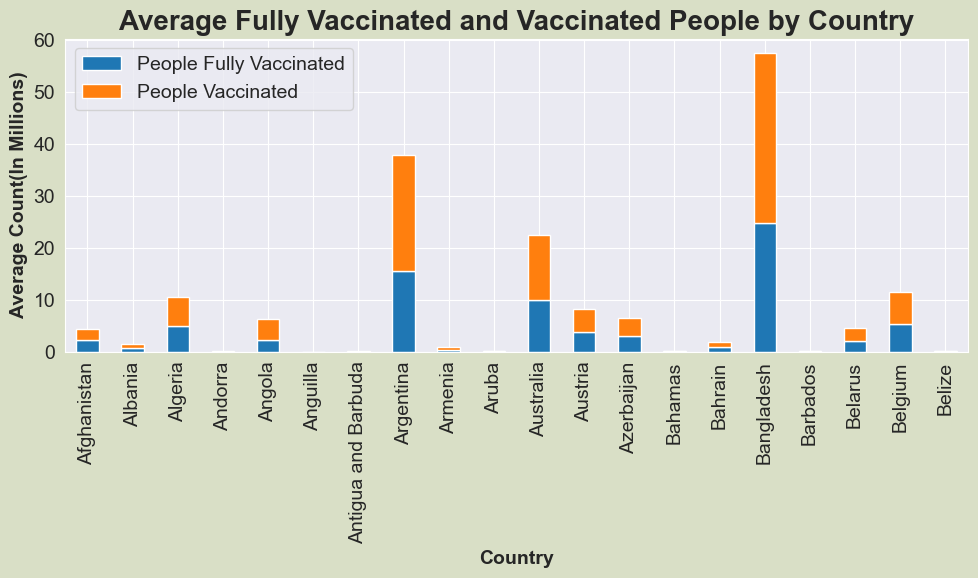

In [38]:
# Plotting a stacked bar chart to compare the number of people vaccinated and fully vaccinated per country
# This chart displays the total vaccination count for each country, with the stacked sections showing fully vaccinated vs vaccinated people
new_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding a title to the plot to give context about the data being displayed
# The title helps to clarify what this chart represents: the average number of fully vaccinated and vaccinated people by country
plt.title('Average Fully Vaccinated and Vaccinated People by Country', fontweight='bold', fontsize=20)
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Average Count(In Millions)', fontweight='bold')
plt.xticks(rotation=90)  # Rotating country names for better visibility
plt.tight_layout()  # To make sure everything fits

# Show the plot
plt.show()

# Insight: Comparing Average Fully Vaccinated vs. People Vaccinated by Country

## Overview 
- This bar chart compares two key vaccination metrics—average counts (in millions) of people fully vaccinated (blue) and people vaccinated (orange)—across a diverse set of countries.
- The visualization enables a side-by-side assessment of each country’s progress in administering the full regimen versus initiating vaccinations.

## Key Observations
### Differences in Completion Rates:
- For many countries, the blue bars (fully vaccinated) are shorter than the orange bars (people vaccinated), which is expected since not everyone who receives an initial dose completes the full vaccination schedule.
-The gap between these bars can indicate how effectively each country manages follow-ups for the complete vaccination course.

### Country-Specific Trends:
- Countries with high overall counts (for example, developed nations like Australia, Austria, or Belgium) likely show both high numbers for people vaccinated and a smaller gap between the two measurements. This suggests robust healthcare infrastructures and effective vaccine rollout strategies.
- Conversely, countries with lower averages (such as Afghanistan or Angola) may exhibit more pronounced differences, highlighting challenges in both vaccine availability and follow-through in completing the vaccination series.

### Variability Across Regions:
- The chart spans a range of country sizes and economic profiles—from small territories and island nations (like Anguilla, Aruba, and Antigua and Barbuda) to larger regions (such as Argentina and Algeria). This spread provides insight into how different regions—not only by population size but also by health system capacity—perform in their vaccination campaigns.

## Analysis Purpose
- Public Health Evaluation: Identifying disparities between initial vaccinations and full vaccinations marks opportunities where follow-up strategies might be reinforced. Countries with a narrow gap demonstrate effective campaign management, serving as models for others.
- Targeted Policy Response: By pinpointing where the completion rate is lagging, policymakers can allocate resources and tailor communication strategies to encourage full vaccination adherence.
- Comparative Benchmarking: Comparing these averages across countries offers a performance snapshot that can guide both local and regional policy decisions, illustrating where public health interventions have been most successful—and where they may need enhancement.

In [39]:
# Grouping the data by 'country' and calculating the average total vaccinations for each country
# Then, sorting the results in descending order to get the countries with the highest total vaccinations
# Finally, selecting the top 20 countries with the highest average total vaccinations
country_vac = df.groupby('country')['total_vaccinations'].mean().sort_values(ascending=False).head(20)

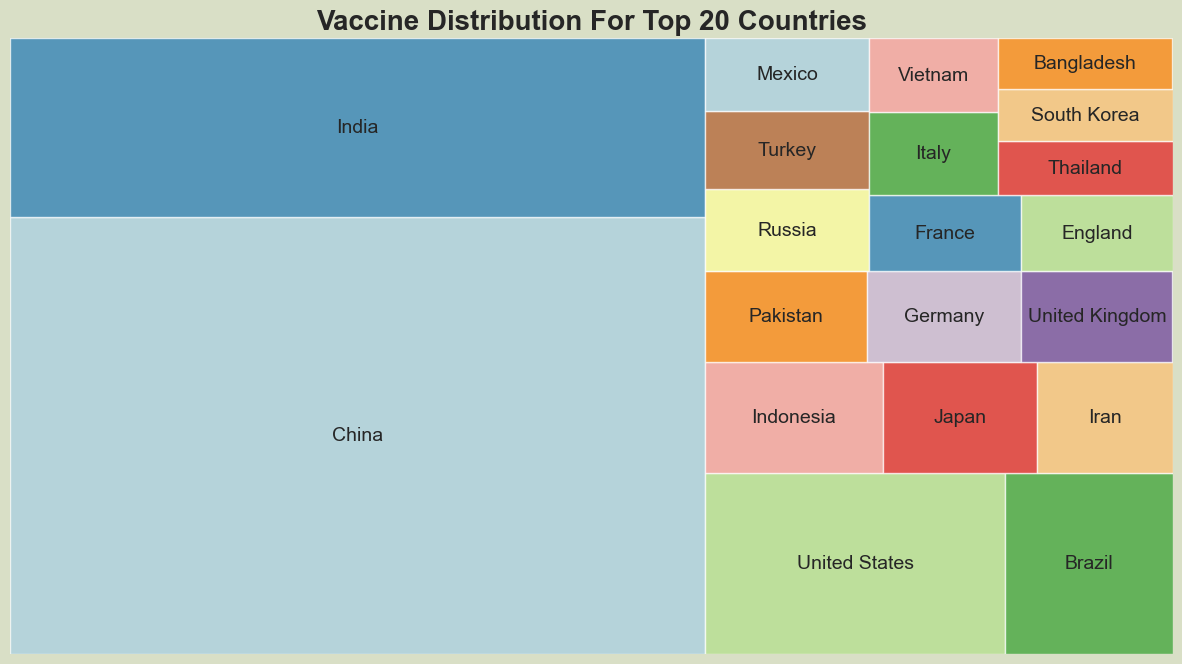

In [40]:
sizes = new_df["People Vaccinated"]
labels = new_df.index
plt.figure(figsize=(15, 8))

# Plotting the squarify plot with the sizes representing "People Vaccinated" for each country
# The colors are taken from the 'Paired' colormap for diversity
# alpha controls the transparency of the blocks
squarify.plot(sizes=country_vac, label=country_vac.index, alpha=0.7, color=plt.cm.Paired.colors)
plt.axis("off")
plt.title('Vaccine Distribution For Top 20 Countries', fontsize=20, fontweight='bold')
plt.show()


# Insight: Global Vaccine Distribution Among the Top 20 Countries

## Overview 
- This treemap visualizes vaccine distribution across the top 20 countries, with each rectangle's size representing the relative volume of vaccines distributed.
- The visualization clearly highlights that India and China dominate the landscape, while the remaining countries vary in distribution magnitude.

## Key Observations
### Dominance of India and China:
- The largest rectangles belong to India and China, underscoring their substantial share in global vaccine distribution. This is likely driven by their large populations and strong domestic vaccine production and distribution networks.

### Significant Contributions from Emerging Markets:
- Countries such as Mexico, Vietnam, and Bangladesh also command notable areas in the treemap. Their sizable representations indicate robust efforts to distribute vaccines despite differing resource constraints and demographic profiles.

### Wide Geographical Representation:
- The treemap includes nations from various regions—Asia (e.g., Thailand, South Korea, Indonesia, Japan, Iran), Europe (e.g., Italy, France, England, Germany, United Kingdom, Turkey), and the Americas (e.g., Mexico, United States, Brazil). This diversity emphasizes the global reach of vaccination campaigns and the varied challenges and strategies across regions.

### Policy and Resource Implications:
- The disparities in rectangle sizes suggest varied capacities and approaches to vaccine distribution. Countries with smaller allocations could represent areas where enhanced supply logistics or targeted policy interventions might bolster vaccine access.

## Analysis Purpose
- Evaluating Global Vaccine Outreach: The treemap serves as a snapshot of which countries are leading the vaccine distribution efforts, helping public health officials and policymakers assess performance and resource allocation across different regions.
- Benchmarking Best Practices: With India and China at the forefront, their strategies in ramping up vaccine distribution could offer actionable insights for other nations looking to enhance their own programs.
- Guiding Future Interventions: Understanding these distribution patterns can aid in identifying regions that may need additional support and tailored strategies to achieve equitable vaccine coverage globally.

In [41]:
data = pd.DataFrame(df.groupby(['country', 'vaccines']).size()).reset_index()

In [42]:
# Grouping the dataframe by 'country' and 'vaccines' columns to count the occurrences of each combination
# Using .size() to get the count of each group, then resetting the index to convert it into a DataFrame
data.rename(columns={0:'size'}, inplace=True)

In [43]:
# Sorting the 'data' DataFrame by the 'size' column in descending order to get the top 20 combinations
data = data.sort_values('size', ascending=False).head(20)

# Resetting the index of the 'data' DataFrame after sorting, and dropping the old index to clean up
data = data.reset_index(drop=True)

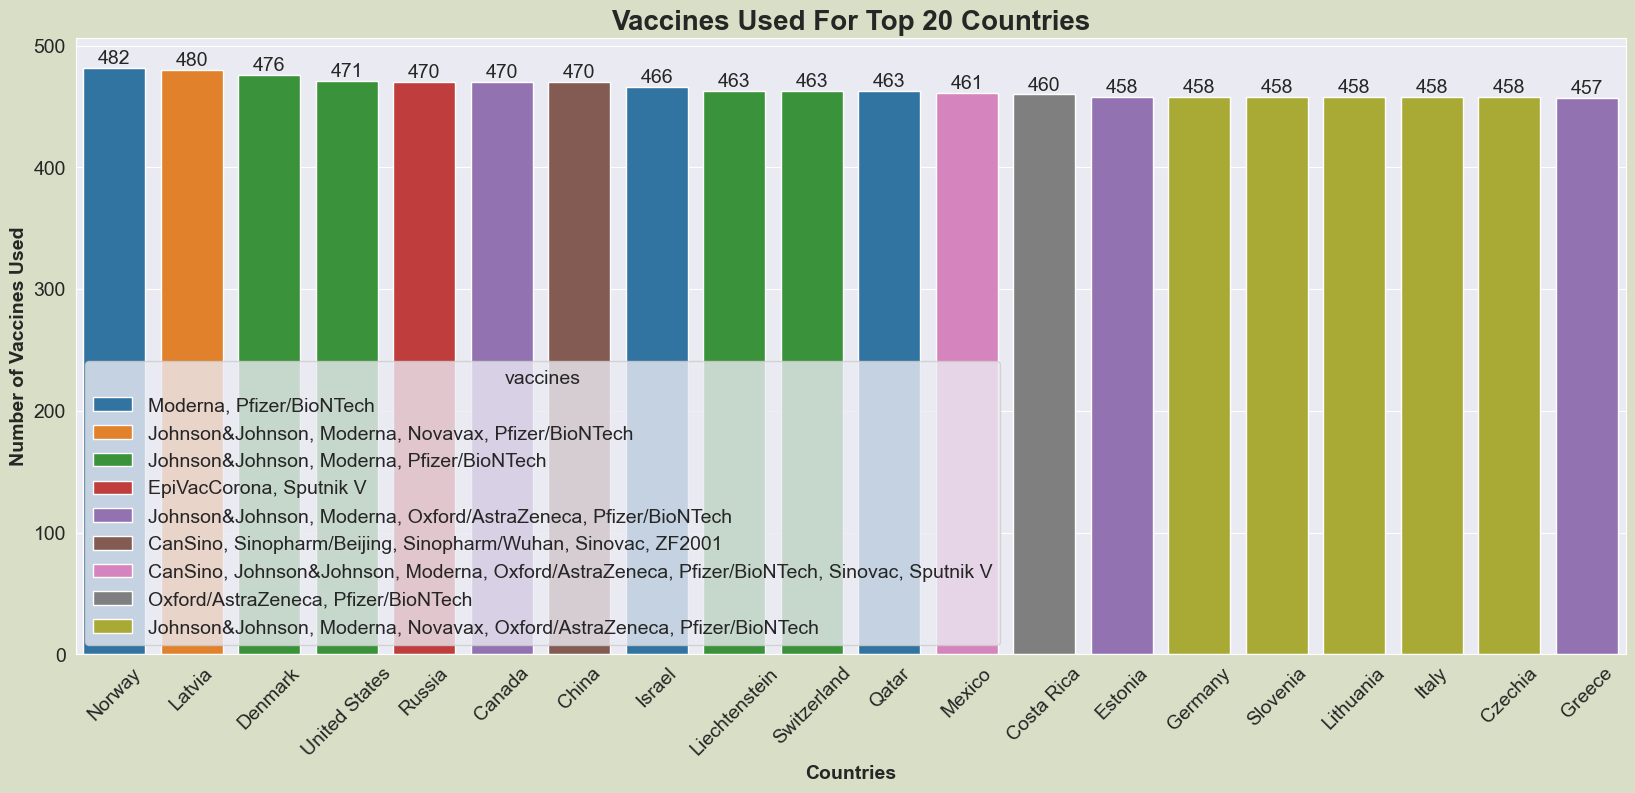

In [44]:
# Creating a bar plot for the top 20 countries with their respective vaccine usage, with different colors for each vaccine type
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=data['country'], y=data['size'], hue=data['vaccines'])

for index in range(len(data)):
    try:
        ax.bar_label(ax.containers[index])
    except:
        pass

plt.title('Vaccines Used For Top 20 Countries', fontweight='bold', fontsize=20)
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Number of Vaccines Used', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# Insight: Vaccine Usage and Combination Strategies Among the Top 20 Countries

## Overview 
- This bar chart, titled "Vaccines Used For Top 20 Countries," presents the total number of vaccine doses used in each country by listing individual countries along the x-axis and quantifying the number of vaccines used on the y-axis (ranging from 0 to 500).
- Each bar is segmented by color to represent various combinations of vaccines deployed—such as Moderna, Pfizer/BioNTech, Johnson & Johnson, Novavax, EpiVacCorona, Sputnik V, Oxford/AstraZeneca, CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, and ZF2001—offering insights into how each country diversifies its immunization strategy.

## Key Observations
### Diverse Deployment Strategies:
- The segmentation by color within each bar reveals that most countries are not relying on a single vaccine brand. Instead, they are combining several vaccines, which could be a response to supply challenges, varying regulatory approvals, or a strategic effort to maximize coverage and immunity.

### Variation in Total Usage Levels:
- The numbers at the top of each bar indicate that countries differ widely in the total number of vaccine doses used. Higher totals may reflect larger populations, high vaccination campaigns, or more aggressive strategies in securing multiple sources of vaccines.

### Regional and Policy Implications:
- Some regions might show a predilection for certain vaccine brands. For instance, European countries like Norway, Latvia, and Denmark could be leveraging combinations that include Western manufacturers (Pfizer/BioNTech, Moderna, Oxford/AstraZeneca), while countries such as Russia or even China showcase the inclusion of their domestically produced or regionally favored vaccines.
- This diversification helps mitigate risks associated with supply disruptions and offers flexibility if new variants necessitate different immunization approaches.

### Strategic Risk Mitigation:
- By deploying multiple vaccine types, countries can better manage variability in vaccine availability and efficacy. The chart allows for a side-by-side comparison of which countries have balanced portfolios and which might be more dependent on a specific supplier, informing future procurement and public health strategies.

## Analysis Purpose
- Benchmarking and Policy Formulation: This visualization serves as a benchmark to evaluate and compare the vaccination strategies of leading countries. Policymakers can identify best practices from nations with a well-diversified vaccine mix and high coverage.
- Supply Chain and Operational Insights: Understanding the composition and total usage of vaccines aids in assessing the resilience of each country’s vaccine supply chain. A more diversified approach may correlate with enhanced ability to cope with global shortages or emergent variants.
- Global Strategy Optimization: By closely examining these combinations, stakeholders can plan more strategic vaccine acquisitions, adapt to regulatory or supply challenges, and ultimately drive more efficient global immunization campaigns.

In [45]:
# Getting the top 5 most common values in the 'source_name' column and counting their occurrences
sour_name = df['source_name'].value_counts().head(5)

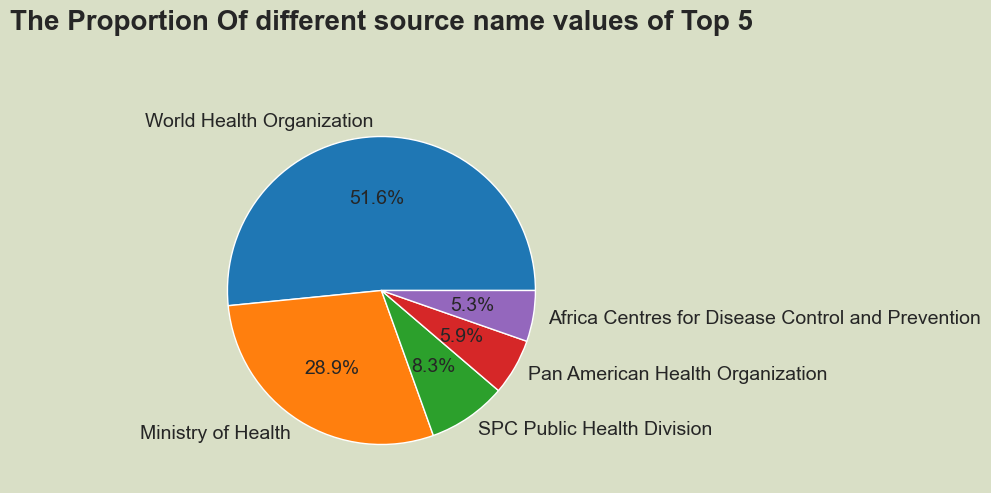

In [46]:
# Plotting a pie chart to show the proportion of the top 5 'source_name' values
plt.pie(sour_name, labels=sour_name.index, autopct='%1.1f%%')

# Adding a title with bold font and setting the font size to 20
plt.title('The Proportion Of different source name values of Top 5\n\n', fontweight='bold', fontsize=20)

# Displaying the pie chart
plt.show()

# Insight: Dominance of Global Health Data Sources

## Overview 
- This pie chart, titled "The Proportion Of different source name values of Top 5," visually represents the relative contributions of key health organizations that supply data. It highlights the diversity and weight of each source in shaping global health insights.

## Key Observations
### World Health Organization (WHO) Leads:
- With 51.6% of the share, WHO is the predominant source, indicating its central role in providing comprehensive and authoritative health data worldwide.

### Substantial Contribution from Local Ministries:
- The Ministry of Health, at 28.9%, stands as the second largest contributor. This underscores the importance of localized data inputs in complementing global datasets.

### Supporting Roles of Regional Organizations:
- The remaining portions—SPC Public Health Division (8.3%), Pan American Health Organization (5.9%), and Africa Centres for Disease Control and Prevention (5.3%)—though smaller, are crucial. They reflect regional efforts and context-specific insights which add valuable diversity to the overall data landscape.

## Analysis Purpose
- Data Credibility and Balance: With over half of the data derived from WHO, the global health narrative is heavily influenced by their findings. However, the significant contribution from Ministries of Health and regional bodies ensures that diverse, localized perspectives are captured.
- Strategic Focus for Data Integration: Understanding these proportions can guide decision-makers on where data integration efforts might be optimized. Emphasizing data from regional organizations could enhance context-specific strategies, while WHO’s overarching insights provide a broad framework.
- Resource Allocation and Trust Building: The clear dominance of WHO and Ministries of Health might also reflect where most of the investment in data collection and reporting occurs, highlighting key areas for future capacity building and resource allocation.

In [47]:
# Grouping the data by 'country' and 'source_name', counting the occurrences of each combination,
# resetting the index to turn the result into a DataFrame, and sorting by 'source_name'
data = pd.DataFrame(df.groupby(['country', 'source_name']).size()).reset_index().sort_values('source_name')

In [48]:
# Filtering the 'data' DataFrame to only include rows where the 'source_name' is duplicated
# The 'duplicated' method marks rows with duplicates based on the 'source_name' column
# keep=False ensures that all occurrences of the duplicated rows are kept, not just the first or last
data = data[data.duplicated(subset='source_name', keep=False)]

In [49]:
# Counting the occurrences of each 'source_name' in the 'data' DataFrame
# The value_counts() method returns a Series with the count of unique values in the 'source_name' column
count_source_name = data['source_name'].value_counts()

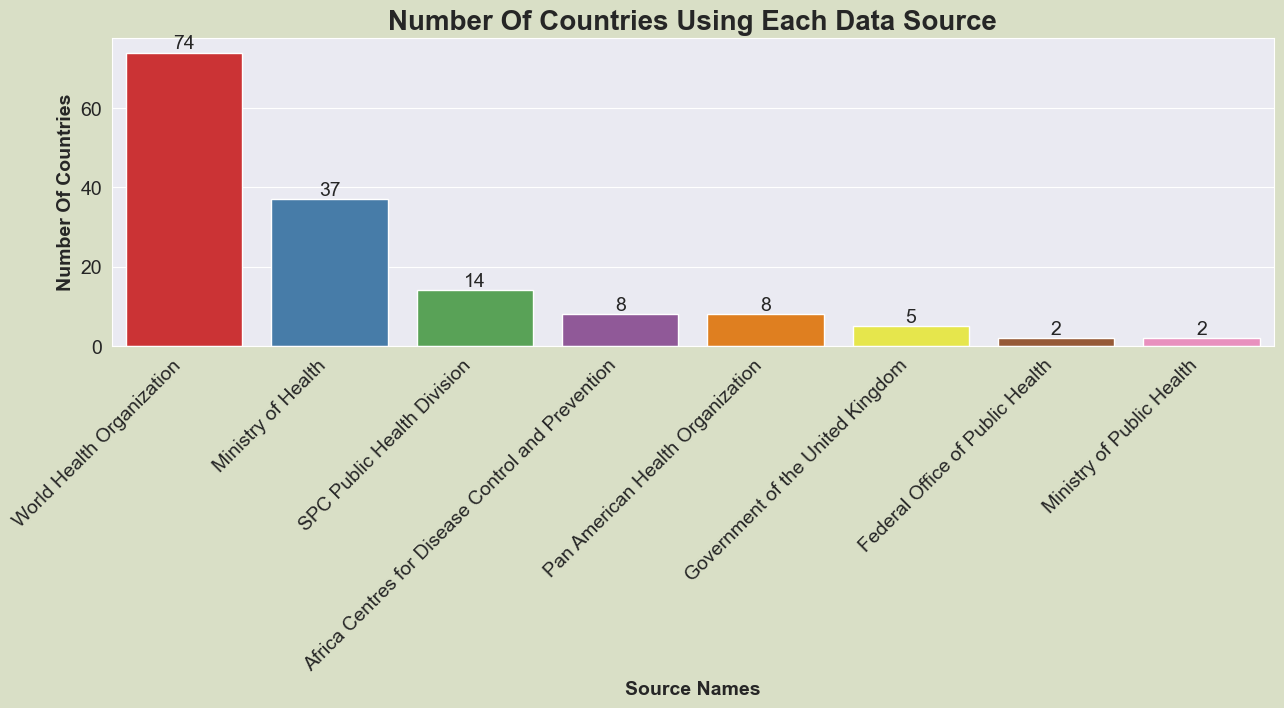

In [51]:
# Plotting a bar chart to show the number of countries using each data source
# The x-axis represents the number of countries using each data source
# The y-axis represents the different source names
# The 'hue' argument helps to differentiate the bars by color according to the source name
plt.figure(figsize=(15, 4))
ax = sns.barplot(x=count_source_name.index, y=count_source_name, hue=count_source_name.index, palette='Set1')

for index in range(len(count_source_name)):
    try:
        ax.bar_label(ax.containers[index])
    except:
        pass

plt.title('Number Of Countries Using Each Data Source', fontsize=20, fontweight='bold')
plt.xlabel('Source Names', fontweight='bold')
plt.ylabel('Number Of Countries', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight: Utilization of Global Health Data Sources by Countries

## Overview 
- This bar chart, titled "Number Of Countries Using Each Data Source," displays the frequency with which different health data sources are utilized by countries.
- The x-axis represents the number of countries adopting each data source, while the y-axis lists the specific sources. The chart provides a clear snapshot of the global reliance on various institutions for health data.

## Key Observations
- Dominance of the World Health Organization: With 74 countries using its data, the World Health Organization (WHO) is by far the most popular source. This underscores its established reputation and critical role in disseminating globally trusted health information.
- Strong Reliance on National Ministries: The Ministry of Health is used by 37 countries, indicating that many nations prefer to incorporate their own governmental health data alongside or in place of international sources for localized insights.
- Regional and Specialized Sources: The SPC Public Health Division, Africa Centres for Disease Control and Prevention, and Pan American Health Organization are used by 14, 8, and 8 countries respectively. These figures highlight the importance of region-specific data sources that cater to localized public health needs and challenges.
- Lower Adoption of Certain National Entities: Data sources like the Government of the United Kingdom (used by 5 countries), Federal Office of Public Health, and Ministry of Public Health (each with 2 countries) have a much smaller footprint. This might reflect a more limited geographic scope, policy restrictions, or data specialization that appeals to a narrower audience.

## Analysis Purpose
- Assessing Data Source Influence: The chart clearly demonstrates that international bodies like WHO and national Ministries of Health are central pillars in the global health data ecosystem. These sources drive policy decisions and public health strategies on a large scale.
- Understanding Regional Dynamics: The prominence of regional organizations, even with lower numbers, emphasizes the value of localized insights in guiding targeted health interventions. Such data sources may offer nuanced perspectives that align more closely with regional and cultural specifics.
- Guiding Future Data Integration Efforts: For policymakers and health analysts, understanding which data sources are widely adopted can aid in harmonizing data integration efforts. Prioritizing widely trusted sources like WHO while supplementing with regional and national insights can lead to more robust, context-sensitive health policies.